###Mini Project Using TinyML

#*CAR* PARKING PREDICTION USING TinyML

set up a convolutional neural network (CNN) using TensorFlow and Keras for image classification. It includes data loading, model building, and evaluation with visualization using Matplotlib.

In [13]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten
from sklearn.model_selection import train_test_split
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sys import getsizeof

define a function get_file_size to retrieve the size of a file specified by the provided file path and another function convert_bytes to convert the file size into either kilobytes or megabytes for better readability.

In [23]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size


def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [2]:
X=[]
Y=[]

define a function loadData to load image data from a specified directory (dir) with a corresponding label (label). It iterates through files in the directory, reads and resizes each image using OpenCV, and appends the image data to a list X while assigning binary labels (0 for 'free' and 1 for the specified label).

In [3]:
def loadData(dir,label):
  for file in os.listdir(dir):
    path=os.path.join(dir,file)
    img=cv2.imread(path,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(100,100))
    X.append(np.array(img))
    Y.append(0 if label == 'free' else 1)

Load the dataset

In [4]:
loadData('/content/drive/MyDrive/data/Free','free')

In [5]:
loadData('/content/drive/MyDrive/data/Full','full')

converts the lists X and Y into NumPy arrays and then normalizes the pixel values in the image data array X by dividing each pixel value by 255, typically done to scale the values between 0 and 1 for better convergence during model training.

In [6]:
X = np.array(X)
Y = np.array(Y)
X = X/255

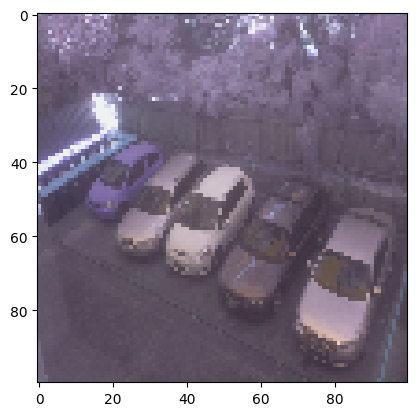

In [7]:
idx = random.randint(0,len(X))
plt.imshow(X[idx])
plt.show()

#Training The Model

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [9]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')

])

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
41/41 [==============================] - 37s 865ms/step - loss: 0.4796 - accuracy: 0.7581
Epoch 2/5
41/41 [==============================] - 44s 1s/step - loss: 0.2910 - accuracy: 0.8835
Epoch 3/5
41/41 [==============================] - 32s 795ms/step - loss: 0.1937 - accuracy: 0.9310
Epoch 4/5
41/41 [==============================] - 32s 786ms/step - loss: 0.1480 - accuracy: 0.9444
Epoch 5/5
41/41 [==============================] - 33s 817ms/step - loss: 0.1127 - accuracy: 0.9644


In [12]:
model.evaluate(X_test,Y_test)

21/21 [==============================] - 2s 79ms/step - loss: 0.1421 - accuracy: 0.9433


[0.14209793508052826, 0.9433384537696838]

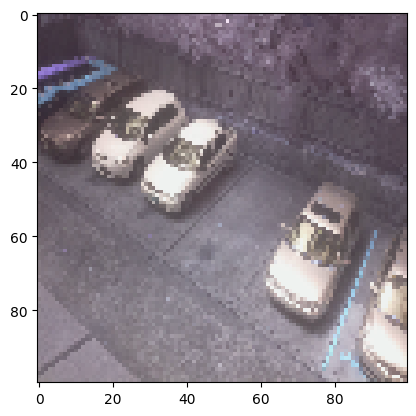

1/1 [==============================] - 0s 342ms/step
our model says it is : free


In [14]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()
y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
pred='free' if y_pred==0 else 'full'
print("our model says it is :",pred)

In [15]:
model.save('carprediction.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
new_model = keras.models.load_model('carprediction.h5')

calculate the size of the loaded model in megabytes using the convert_bytes and get_file_size functions.



In [24]:
convert_bytes(get_file_size('carprediction.h5'), "MB")

File size: 12.557 Megabytes


In [25]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

convert a Keras model (model) to TensorFlow Lite format using tf.lite.TFLiteConverter.

In [26]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

writes the resulting TensorFlow Lite model to a file specified by TF_LITE_MODEL_FILE_NAME

In [27]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "MB")

File size: 4.175 Megabytes


print and assign the size of the TensorFlow Lite model file in megabytes using the convert_bytes and get_file_size functions.

In [28]:
tflite_file_size = get_file_size(TF_LITE_MODEL_FILE_NAME)

The variable tflite_file_size stores the calculated size.

In [29]:
tflite_file_size

4378072